# Indiana Pacers Game Analysis

This notebook demonstrates the process of analyzing Indiana Pacers' game data using the NBA API. It covers fetching game data, calculating advanced basketball statistics, and visualizing these statistics through quadrant charts. This notebook is intended to showcase my proficiency in Python programming, data manipulation, and visualization.

## Step 1: Import necessary libraries

In [1]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import teamgamelogs
from nba_api.stats.endpoints import leaguegamefinder
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

## Step 2: Find the team ID for the Indiana Pacers

In [2]:
# Find the team ID for the Indiana Pacers
team_info = teams.find_teams_by_full_name('Indiana Pacers')
pacers_id = team_info[0]['id']
pacers_id

1610612754

## Step 3: Fetch game logs for the Pacers and their opponents

In [ ]:
rename_dict = {
    'PTS': 'PacersPoints',
    'FGM': 'PacersFGM',
    'FGA': 'PacersFGA',
    'FG_PCT': 'PacersFG%',
    'FG3M': 'Pacers3PointersMade',
    'FG3A': 'Pacers3PointersAttempted',
    'FG3_PCT': 'Pacers3Point%',
    'FTM': 'PacersFreeThrowsMade',
    'FTA': 'PacersFreeThrowsAttempted',
    'FT_PCT': 'PacersFT%',
    'OREB': 'PacersOffensiveRebounds',
    'DREB': 'PacersDefensiveRebounds',
    'REB': 'PacersRebounds',
    'AST': 'PacersAssists',
    'STL': 'PacersSteals',
    'BLK': 'PacersBlocks',
    'TOV': 'PacersTurnovers',
    'PF': 'PacersPersonalFouls'
}

In [5]:
# Fetch game logs for the Pacers
pacersGameFinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=pacers_id)
pacersGamesAll = pacersGameFinder.get_data_frames()[0].dropna().set_index('GAME_ID')
pacersGamesAll['PTS']

GAME_ID
1522400063     93
1522400046     71
1522400030     98
1522400018     94
1522400005     95
             ... 
0029600085     82
0029600065    103
0029600041     84
0029600018     95
0029600007     89
Name: PTS, Length: 2591, dtype: int64

In [ ]:
pacersGamesAll.rename(columns=dict(pacer["val1"], df2["val2"])))

In [4]:
# Fetch game logs for the opponents
PacersGameFinder = leaguegamefinder.LeagueGameFinder(vs_team_id_nullable = pacers_id)
pacersOpponentsGamesAll = PacersGameFinder.get_data_frames()[0].dropna().set_index('GAME_ID')
pacersOpponentsGamesAll = pacersOpponentsGamesAll.drop(columns = ['SEASON_ID','TEAM_ID','TEAM_ABBREVIATION','TEAM_NAME','GAME_DATE','MATCHUP','MIN', 'PLUS_MINUS'])
pacersOpponentsGamesAll = pacersOpponentsGamesAll.rename(
    columns={'PTS': 'OpponentPoints',
             'FGM': 'OpponentFGM',
             'FGA': 'OpponentFGA',
             'FG_PCT': 'OpponentFG%',
             'FG3M': 'Opponent3PointersMade',
             'FG3A': 'Opponent3PointersAttempted',
             'FG3_PCT': 'Opponent3Point%',
             'FTM': 'OpponentFreeThrowsMade',
             'FTA': 'OpponentFreeThrowsAttempted',
             'FT_PCT': 'OpponentFT%',
             'OREB': 'OpponentOffensiveRebounds',
             'DREB': 'OpponentDefensiveRebounds',
             'REB': 'OpponentRebounds',
             'AST': 'OpponentAssists',
             'STL': 'OpponentSteals',
             'BLK': 'OpponentBlocks',
             'TOV': 'OpponentTurnovers',
             'PF': 'OpponentPersonalFouls'
            })

## Step 4: Merge the Pacers and opponents' game data

In [5]:
# Merge the game logs
gameLogs = pacersGamesAll.merge(pacersOpponentsGamesAll, on='GAME_ID')

## Step 5: Calculate advanced statistics

In [6]:
# Calculate effective field goal percentage (eFG%)
pacersEfgPercent = (((gameLogs['Pacers3PointersMade'] / 2) + gameLogs['PacersFGM']) / gameLogs['PacersFGA']).to_frame()
pacersOrebPercent = ((gameLogs['PacersOffensiveRebounds']) / (gameLogs['PacersOffensiveRebounds'] + gameLogs['OpponentDefensiveRebounds'])).to_frame()
pacersTOPercent = (gameLogs['PacersTurnovers'] / (gameLogs['PacersFGA'] + 0.475 * gameLogs['PacersFreeThrowsAttempted'] + gameLogs['PacersTurnovers'])).to_frame()
pacersFreeThrowRatePercent = (gameLogs['PacersFreeThrowsAttempted'] / gameLogs['PacersFGA']).to_frame()

opponentEfgPercent = (((gameLogs['Opponent3PointersMade'] / 2) + gameLogs['OpponentFGM']) / gameLogs['OpponentFGA']).to_frame()
opponentOrebPercent = ((gameLogs['OpponentOffensiveRebounds']) / (gameLogs['OpponentOffensiveRebounds'] + gameLogs['PacersDefensiveRebounds'])).to_frame()
opponentTOPercent = (gameLogs['OpponentTurnovers'] / (gameLogs['OpponentFGA'] + 0.475 * gameLogs['OpponentFreeThrowsAttempted'] + gameLogs['OpponentTurnovers'])).to_frame()
opponentFreeThrowRatePercent = (gameLogs['OpponentFreeThrowsAttempted'] / gameLogs['OpponentFGA']).to_frame()

## Step 6: Create dataframes for each statistic

In [7]:
EFGPercent = pacersEfgPercent.merge(opponentEfgPercent, on='GAME_ID').rename(
    columns={'0_x': 'Pacers',
             '0_y': 'Opponent'
            }
).merge(pacersGamesAll['WL'], on='GAME_ID')

ORebPercent = pacersOrebPercent.merge(opponentOrebPercent, on='GAME_ID').rename(
    columns={'0_x': 'Pacers',
             '0_y': 'Opponent'
            }
).merge(pacersGamesAll['WL'], on='GAME_ID')

TurnoverPercent = pacersTOPercent.merge(opponentTOPercent, on='GAME_ID').rename(
    columns={'0_x': 'Pacers',
             '0_y': 'Opponent'
            }
).merge(pacersGamesAll['WL'], on='GAME_ID')

FreeThrowRatePercent = pacersFreeThrowRatePercent.merge(opponentFreeThrowRatePercent, on='GAME_ID').rename(
    columns={'0_x': 'Pacers',
             '0_y': 'Opponent'
            }
).merge(pacersGamesAll['WL'], on='GAME_ID')

## Step 7: Define a function to create quadrant charts

In [8]:
def quadrant_chart(x, y, xtick_labels=None, ytick_labels=None, data_labels=None,
                    highlight_quadrants=None, result_labels=None, ax=None, leagueAvg = None):
    """
    Create the classic four-quadrant chart.
    Args:
        x -- array-like, the x-coordinates to plot
        y -- array-like, the y-coordinates to plot
        xtick_labels -- list, default: None, a two-value list xtick labels
        ytick_labels -- list, default: None, a two-value list of ytick labels
        data_labels -- array-like, default: None, data point annotations
        highlight_quadrants -- list, default: None, list of quadrants to
            emphasize (quadrants are numbered 1-4)
        result_labels -- array-like, default: None, labels indicating 'w' (win) or 'l' (lose)
        ax -- matplotlib.axes object, default: None, the user can pass their own
            axes object if desired
    """
    # allow the user to specify their axes
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 9))

    data = pd.DataFrame({'x': x, 'y': y, 'result': result_labels})

    # calculate averages up front to avoid repeated calculations
    y_avg = data['y'].mean()
    x_avg = data['x'].mean()

    # set x limits
    adj_x = max((data['x'].max() - x_avg), (x_avg - data['x'].min())) * 1.1
    lb_x, ub_x = (x_avg - adj_x, x_avg + adj_x)
    ax.set_xlim(lb_x, ub_x)

    # set y limits
    adj_y = max((data['y'].max() - y_avg), (y_avg - data['y'].min())) * 1.1
    lb_y, ub_y = (y_avg - adj_y, y_avg + adj_y)
    ax.set_ylim(lb_y, ub_y)

    xLabelValues = [lb_x, (x_avg - adj_x / 2), x_avg, (x_avg + adj_x / 2), ub_x]
    xLabels = [np.round(lb_x,2), np.round((x_avg - adj_x / 2),2), np.round(x_avg,2), np.round((x_avg + adj_x / 2),2), np.round(ub_x,2)]

    # set x tick labels
    if xtick_labels:
        ax.set_xticks(xLabelValues)
        ax.set_xticklabels(xLabels)

    yLabelValues = [lb_y, (y_avg - adj_y / 2), y_avg, (y_avg + adj_y / 2), ub_y]
    yLabels = [np.round(lb_y,2), np.round((y_avg - adj_y / 2),2), np.round(y_avg,2), np.round((y_avg + adj_y / 2),2), np.round(ub_y,2)]

    # set y tick labels
    if ytick_labels:
        ax.set_yticks(yLabelValues)
        ax.set_yticklabels(yLabels)

    # plot remaining points and quadrant lines
    for result, color in zip(['W', 'L'], ['#002D62', '#FDBB30']):
        subset_data = data[data['result'] == result]
        ax.scatter(x=subset_data['x'], y=subset_data['y'], linewidth = 0.25, edgecolor='blue',c=color, zorder=99, s=15,label=result.upper())

    ax.axvline(x_avg, c='k', lw=1)
    ax.axhline(y_avg, c='k', lw=1)

    ax.scatter(x = leagueAvg, y = leagueAvg, s=10,c = 'black', label="League Average")
    ax.plot([lb_x, leagueAvg, ub_x], [lb_y, leagueAvg, ub_y], linestyle='--', color='black')

    # add legend
    ax.legend()

    ax.set_facecolor('#BEC0C2')
    mplcursors.cursor(hover=True)
    ax.set

## Step 8: Create and display quadrant charts for various statistics

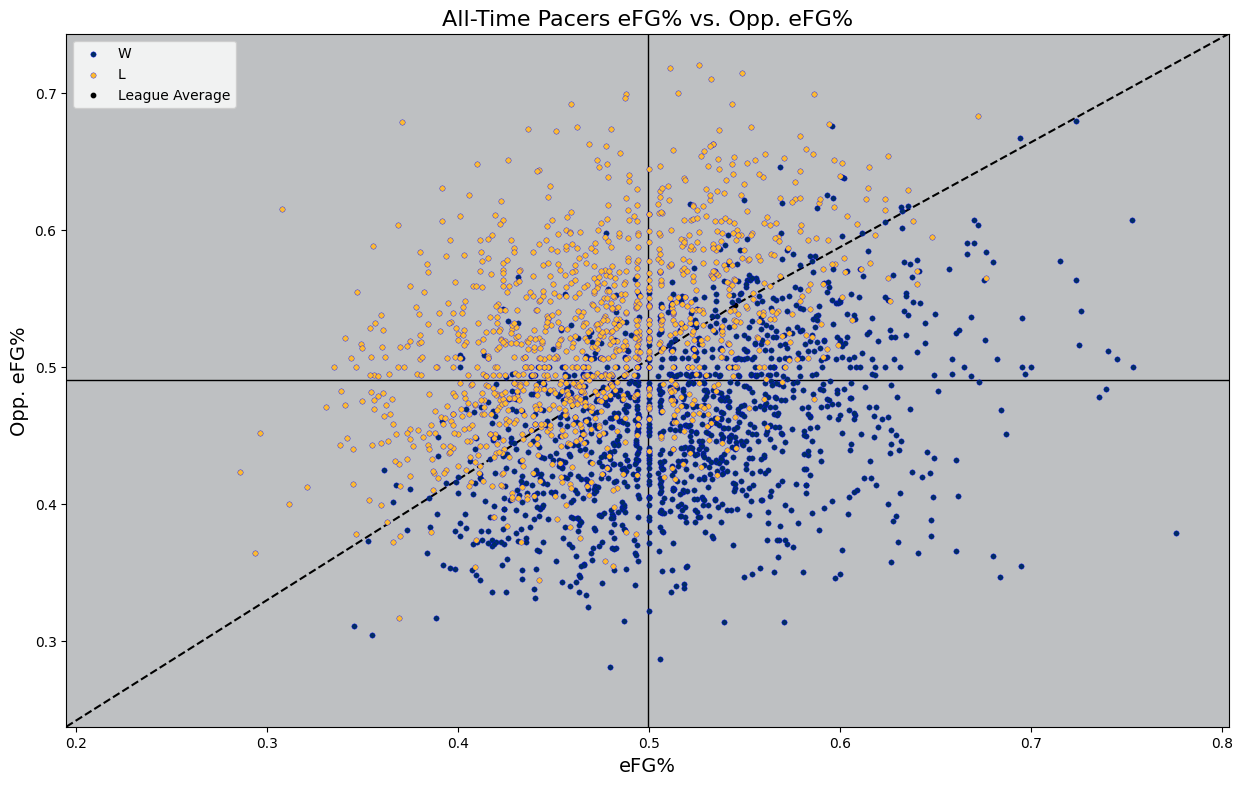

In [9]:
# Effective Field Goal Percentage (eFG%)
pacersEFG = EFGPercent['Pacers']
opponentsEFG = EFGPercent['Opponent']
result_labels = EFGPercent['WL']
league_average_efg = 0.5453

quadrant_chart(pacersEFG, opponentsEFG, result_labels=result_labels, leagueAvg = league_average_efg)
plt.title('All-Time Pacers eFG% vs. Opp. eFG%', fontsize=16)
plt.ylabel('Opp. eFG%', fontsize=14)
plt.xlabel('eFG%', fontsize=14)
plt.show()

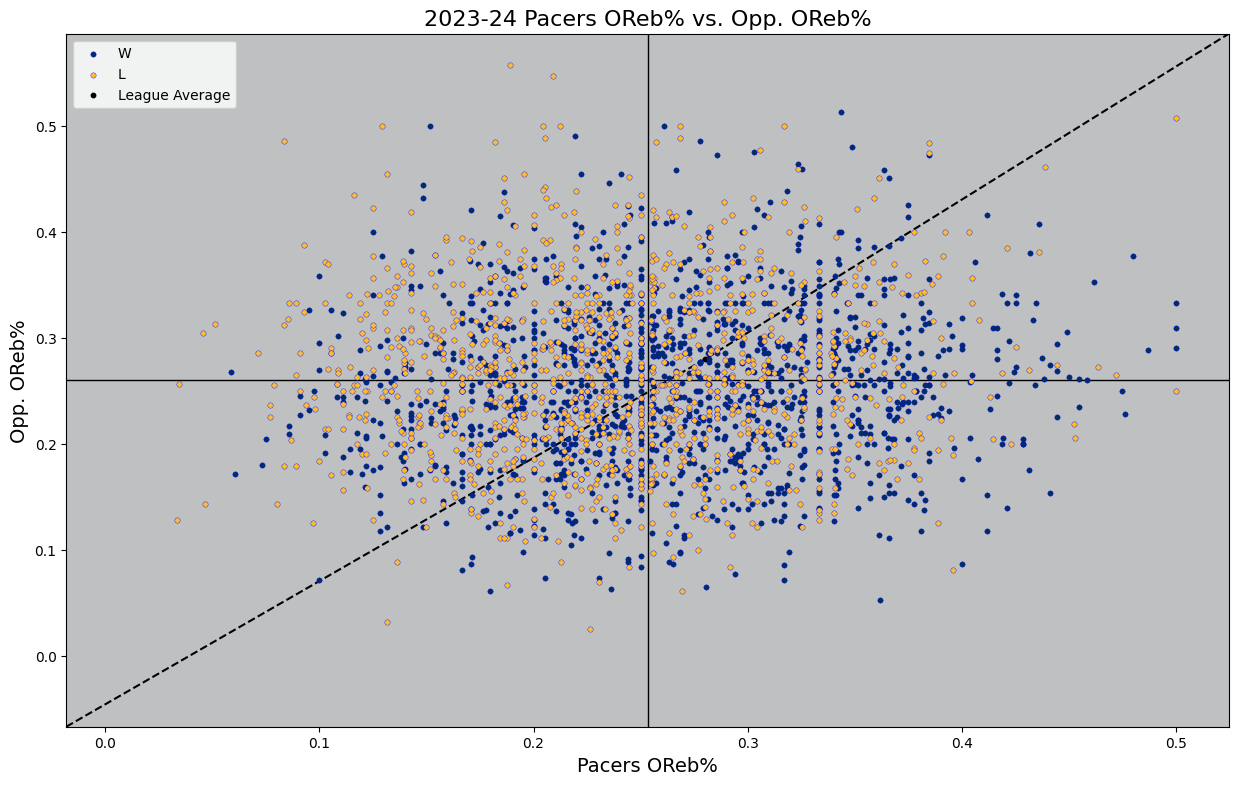

In [10]:
# Offensive Rebound Percentage (OReb%)
pacersOReb = ORebPercent['Pacers']
opponentsOReb = ORebPercent['Opponent']
result_labels = ORebPercent['WL']
league_average_oreb = 0.2802

quadrant_chart(pacersOReb, opponentsOReb, result_labels=result_labels, leagueAvg = league_average_oreb)
plt.title('2023-24 Pacers OReb% vs. Opp. OReb%', fontsize=16)
plt.ylabel('Opp. OReb%', fontsize=14)
plt.xlabel('Pacers OReb%', fontsize=14)
plt.show()

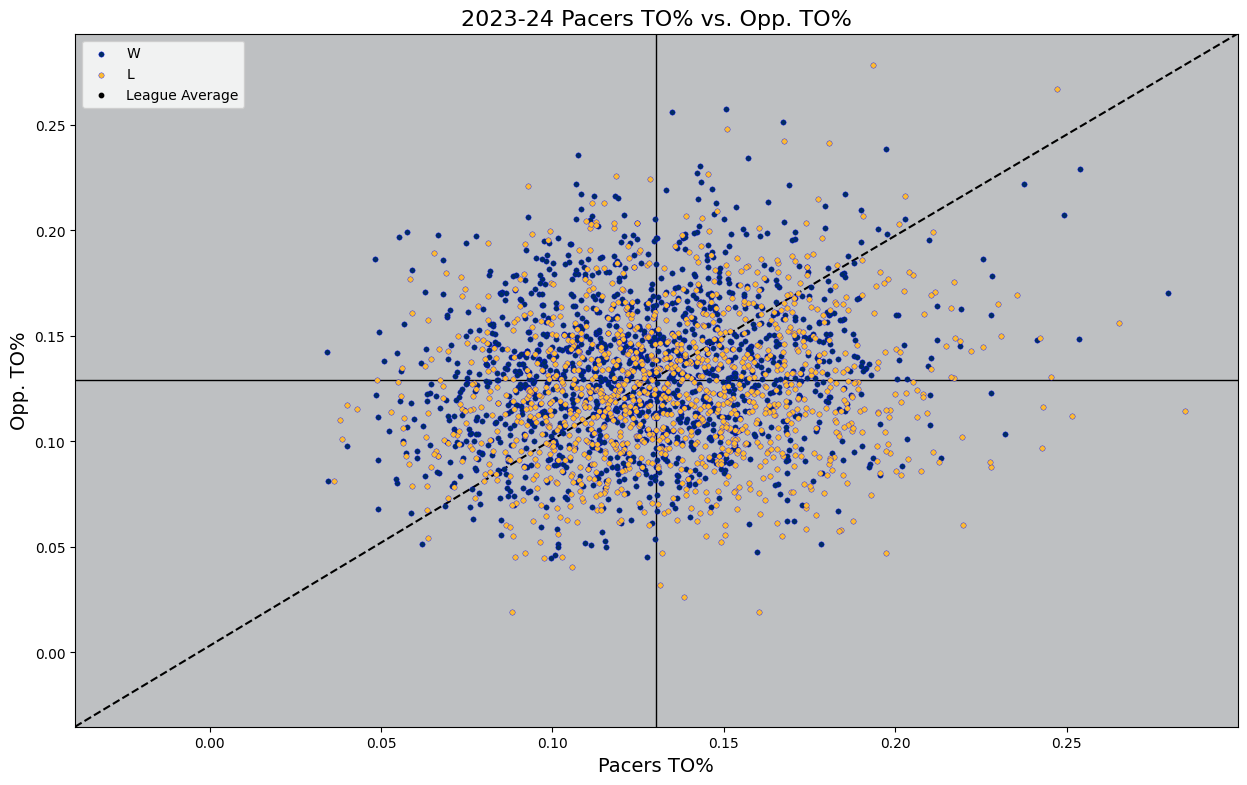

In [11]:
# Turnover Percentage (TO%)
pacersTO = TurnoverPercent['Pacers']
opponentsTO = TurnoverPercent['Opponent']
result_labels = TurnoverPercent['WL']
league_average_to = 0.139

quadrant_chart(pacersTO, opponentsTO, result_labels=result_labels, leagueAvg = league_average_to)
plt.title('2023-24 Pacers TO% vs. Opp. TO%', fontsize=16)
plt.ylabel('Opp. TO%', fontsize=14)
plt.xlabel('Pacers TO%', fontsize=14)
plt.show()

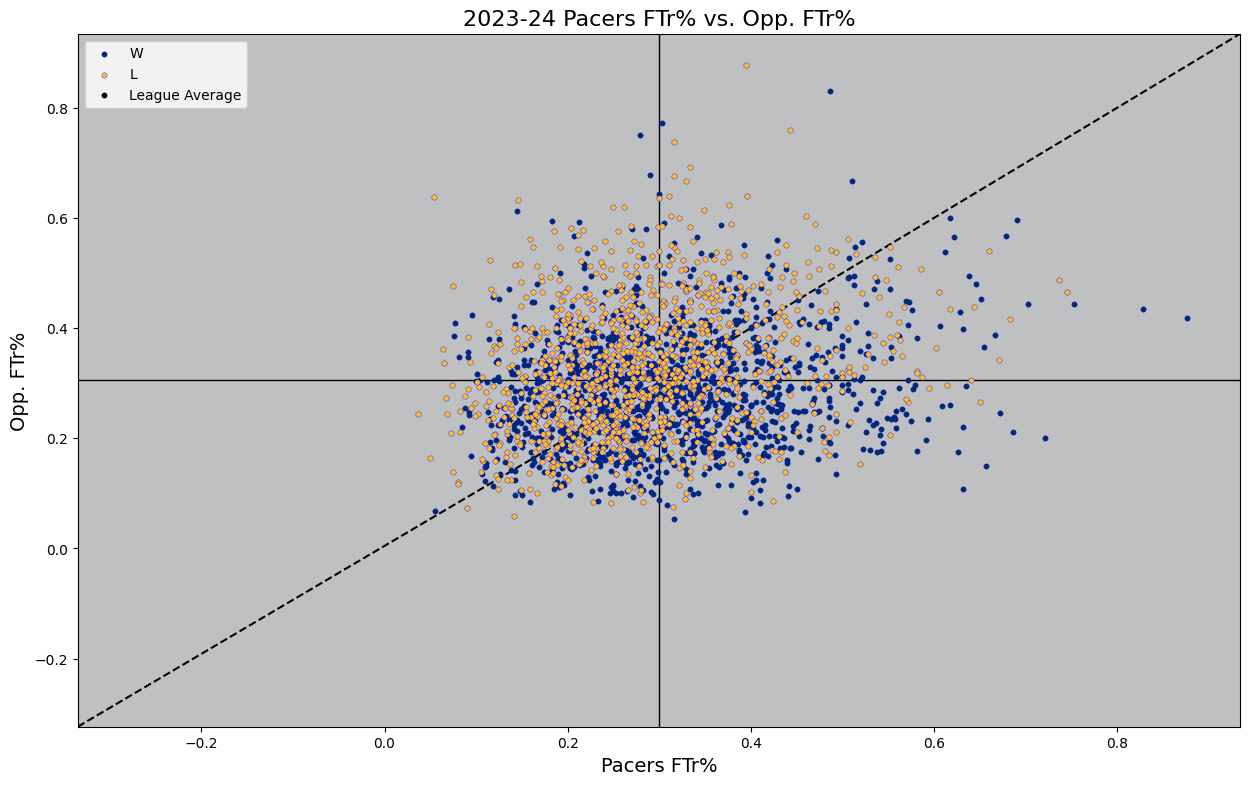

In [12]:
# Free Throw Rate Percentage (FTr%)
pacersFTr = FreeThrowRatePercent['Pacers']
opponentsFTr = FreeThrowRatePercent['Opponent']
result_labels = FreeThrowRatePercent['WL']
league_average_ftr = 0.2274

quadrant_chart(pacersFTr, opponentsFTr, result_labels=result_labels, leagueAvg = league_average_ftr)
plt.title('2023-24 Pacers FTr% vs. Opp. FTr%', fontsize=16)
plt.ylabel('Opp. FTr%', fontsize=14)
plt.xlabel('Pacers FTr%', fontsize=14)
plt.show()